In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)

## Making results table for sparsity levels vs. noise

In [2]:
## Results tables for different sparsity levels
cifar10Res = Path('../results/Experiment5')
cifar100Res = Path('../results/Experiment6')

In [3]:
# Get average result files from each
cifar10files = cifar10Res.glob('*avg.txt')
cifar10files = [f for f in cifar10files]
cifar100files = cifar100Res.glob('*avg.txt')
cifar100files = [f for f in cifar100files]

In [4]:
# For each file in cifar10
c10results = {k:None for k in range(10,100, 10)}
for f in cifar10files:
    sparsity = int(str(f.stem).split('_')[1][-2:])
    with open(f, 'r') as resFile:
        for line in resFile:
            if line.startswith('Average Test Accuracy'):
                val = round(float(line.split()[-1]) * 100, 2)
                c10results[sparsity] = [val]
            if line.startswith('Stdev Test Accuracy'):
                val = round(float(line.split()[-1]) * 100, 2)
                c10results[sparsity].append(val)
# For each file in cifar100
c100results = {k:None for k in range(10,100, 10)}
for f in cifar100files:
    sparsity = int(str(f.stem).split('_')[1][-2:])
    with open(f, 'r') as resFile:
        for line in resFile:
            if line.startswith('Average Test Accuracy'):
                val = round(float(line.split()[-1]) * 100, 2)
                c100results[sparsity] = [val]
            if line.startswith('Stdev Test Accuracy'):
                val = round(float(line.split()[-1]) * 100, 2)
                c100results[sparsity].append(val)             

In [5]:
# Create table
resTable = pd.DataFrame()
resTable['Sparsity'] = list(c10results.keys())
resTable['Cifar10'] = [f'{v1}({v2})' for v1, v2 in list(c10results.values())]
resTable['Cifar100'] = [f'{v1}({v2})' for v1, v2 in list(c100results.values())]

In [6]:
dataResTable = pd.DataFrame()
dataResTable['Sparsity'] = list(c10results.keys())
dataResTable['Cifar10'] = [v1 for v1, v2 in list(c10results.values())]
dataResTable['Cifar100'] = [v1 for v1, v2 in list(c100results.values())]

In [7]:
resTable

,Sparsity,Cifar10,Cifar100
0,10,82.09(1.66),49.7(2.78)
1,20,83.6(1.03),48.45(5.03)
2,30,82.25(0.79),47.65(2.69)
3,40,83.7(1.23),48.89(1.08)
4,50,83.4(0.5),48.55(1.78)
5,60,83.41(0.54),51.32(1.13)
6,70,82.44(1.41),48.49(0.69)
7,80,82.15(1.11),49.94(0.95)
8,90,82.69(0.56),50.38(1.23)


In [8]:
dataResTable

,Sparsity,Cifar10,Cifar100
0,10,82.09,49.70
1,20,83.60,48.45
2,30,82.25,47.65
3,40,83.70,48.89
4,50,83.40,48.55
5,60,83.41,51.32
6,70,82.44,48.49
7,80,82.15,49.94
8,90,82.69,50.38


In [9]:
resTable.to_csv('sparsity_levels_results.csv')
dataResTable.to_csv('sparsity_levels_results_data.csv')

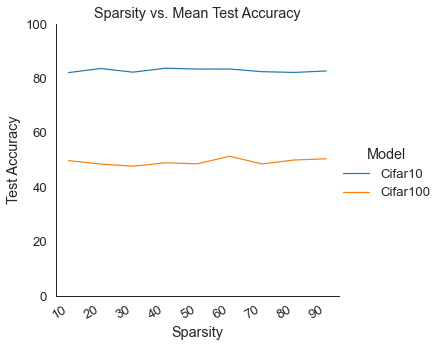

In [14]:
g = sns.relplot(x='Sparsity', y = 'value', hue='variable', kind="line", data=pd.melt(dataResTable, ['Sparsity']))
g.set(ylim=(0,100), ylabel='Test Accuracy', xticks = list(dataResTable['Sparsity']), title='Sparsity vs. Mean Test Accuracy')
g._legend.set_title('Model')
g.figure.autofmt_xdate()

In [15]:
g.savefig("sparsity_levels_figure.png") 

## Making results tables for ERK vs. Dense

In [2]:
# Get all results folders relevant to this experiment
results = Path('../results')
folders = [f for f in results.glob('*Experiment*')]
folders = [f for f in folders if str(f.stem)[-1] in ['1', '2', '3', '4', '9']]
files = [f.glob('*avg*') for f in folders]
files = [f for file in files for f in file]
c10Files = [f for f in files if 'R18' in str(f) and 'SET' not in str(f)]
c100Files = [f for f in files if 'R34' in str(f) and 'SET' not in str(f) and 'RigL' not in str(f)]

In [3]:
c10results = {'sparse': {0: None, 20: None, 30: None, 40: None, 50: None, 80: None, 90: None, 
                         'asym': None, 'human':None}, 
              'dense': {0: None, 20: None, 30: None, 40: None, 50: None, 80: None, 90: None, 
                        'asym': None, 'human': None}}

for f in c10Files:
    if 'asym' in str(f):
        noise = 'asym'
    elif 'human' in str(f):
        noise = 'human'
    else:
        noise = int(str(f.stem).split('_')[-3][:-3])
    sparse = 'sparse' if 'sparse' in str(f).lower() else 'dense'
    with open(f, 'r') as resFile:
        for line in resFile:
            if line.startswith('Average Test Accuracy'):
                val = round(float(line.split()[-1]) * 100, 2)
                c10results[sparse][noise] = [val]
            if line.startswith('Stdev Test Accuracy'):
                val = round(float(line.split()[-1]) * 100, 2)
                c10results[sparse][noise].append(val)
                
c100results = {'sparse': {0: None, 20: None, 30: None, 40: None, 50: None, 80: None, 90: None, 
                         'asym': None, 'human':None}, 
              'dense': {0: None, 20: None, 30: None, 40: None, 50: None, 80: None, 90: None, 
                        'asym': None, 'human': None}}

for f in c100Files:
    if 'asym' in str(f):
        noise = 'asym'
    elif 'human' in str(f):
        noise = 'human'
    else:
        noise = int(str(f.stem).split('_')[-3][:-3])
    sparse = 'sparse' if 'sparse' in str(f).lower() else 'dense'
    with open(f, 'r') as resFile:
        for line in resFile:
            if line.startswith('Average Test Accuracy'):
                val = round(float(line.split()[-1]) * 100, 2)
                c100results[sparse][noise] = [val]
            if line.startswith('Stdev Test Accuracy'):
                val = round(float(line.split()[-1]) * 100, 2)
                c100results[sparse][noise].append(val)


# Create Cifar10 tables
c10results = {k: {k2:[f'{c10results[k][k2][0]}({c10results[k][k2][1]})'] for k2 in c10results[k]} for k in c10results}
c10sparseRow = pd.DataFrame.from_dict(c10results['sparse'])
c10denseRow = pd.DataFrame.from_dict(c10results['dense'])
c10resTable = pd.concat([c10sparseRow, c10denseRow])
c10resTable['Model'] = ['20% ResNet18', 'ResNet18']
c10resTable = c10resTable.set_index('Model')

# Create Cifar100 tables
c100results = {k: {k2:[f'{c100results[k][k2][0]}({c100results[k][k2][1]})'] for k2 in c100results[k]} for k in c100results}
c100sparseRow = pd.DataFrame.from_dict(c100results['sparse'])
c100denseRow = pd.DataFrame.from_dict(c100results['dense'])
c100resTable = pd.concat([c100sparseRow, c100denseRow])
c100resTable['Model'] = ['20% ResNet34', 'ResNet34']
c100resTable = c100resTable.set_index('Model')

In [17]:
c10resTable.to_csv('cifar10_initial_results.csv')

In [16]:
c10resTable.transpose().to_csv('cifar10_initial_results_T.csv')

In [4]:
c10resTable.transpose()

Model,20% ResNet18,ResNet18
0,84.15(0.0),83.9(0.0)
20,80.45(0.0),78.36(0.0)
30,78.6(0.0),77.7(0.0)
40,76.63(0.0),73.53(0.0)
50,71.0(0.0),72.61(0.0)
80,43.81(0.0),44.37(0.0)
90,25.32(0.0),25.9(0.0)
asym,77.7(2.67),80.65(0.15)
human,77.07(0.0),80.36(0.0)


In [18]:
c100resTable.to_csv('cifar100_initial_results.csv')

In [19]:
c100resTable.transpose().to_csv('cifar100_initial_results_T.csv')

In [5]:
c100resTable.transpose()

Model,20% ResNet34,ResNet34
0,56.63(0.0),52.45(0.0)
20,45.18(0.0),41.42(0.0)
30,45.68(0.16),44.54(2.33)
40,42.71(2.13),39.17(4.63)
50,32.4(1.86),32.81(3.08)
80,11.25(1.06),10.3(0.66)
90,2.77(1.13),2.9(1.46)
asym,38.62(1.63),38.07(2.09)
human,41.34(0.0),41.82(0.0)


## Making results tables for SET and RigL

In [22]:
# Get all results folders relevant to this experiment
results = Path('../results')
folders = [f for f in results.glob('*Experiment*')]
folders = [f for f in folders if str(f.stem)[-1] in ['7', '8', '9', '0', '1']]
files = [f.glob('*avg*') for f in folders]
files = [f for file in files for f in file]
c10Files = [f for f in files if 'R18' in str(f) and ('SET' in str(f) or 'RigL' in str(f))]
c100Files = [f for f in files if 'R34' in str(f) and ('SET' in str(f) or 'RigL' in str(f))]

In [26]:
c10results = {'SET': {20: None, 30: None, 40: None, 50: None, 80: None, 90: None, 
                         'asym': None, 'human':None}, 
              'RigL': {20: None, 30: None, 40: None, 50: None, 80: None, 90: None, 
                        'asym': None, 'human': None}}

for f in c10Files:
    if 'asym' in str(f):
        noise = 'asym'
    elif 'human' in str(f):
        noise = 'human'
    else:
        noise = int(str(f.stem).split('_')[-3][:-3])
    sparse = 'SET' if 'set' in str(f).lower() else 'RigL'
    with open(f, 'r') as resFile:
        for line in resFile:
            if line.startswith('Average Test Accuracy'):
                val = round(float(line.split()[-1]) * 100, 2)
                c10results[sparse][noise] = [val]
            if line.startswith('Stdev Test Accuracy'):
                val = round(float(line.split()[-1]) * 100, 2)
                c10results[sparse][noise].append(val)
                
c100results = {'SET': {20: None, 30: None, 40: None, 50: None, 80: None, 90: None, 
                         'asym': None, 'human':None}, 
              'RigL': {20: None, 30: None, 40: None, 50: None, 80: None, 90: None, 
                        'asym': None, 'human': None}}

for f in c100Files:
    if 'asym' in str(f):
        noise = 'asym'
    elif 'human' in str(f):
        noise = 'human'
    else:
        noise = int(str(f.stem).split('_')[-3][:-3])
    sparse = 'SET' if 'set' in str(f).lower() else 'RigL'
    with open(f, 'r') as resFile:
        for line in resFile:
            if line.startswith('Average Test Accuracy'):
                val = round(float(line.split()[-1]) * 100, 2)
                c100results[sparse][noise] = [val]
            if line.startswith('Stdev Test Accuracy'):
                val = round(float(line.split()[-1]) * 100, 2)
                c100results[sparse][noise].append(val)

print(c10results)
print(c100results)
# Create Cifar10 tables
c10results = {k: {k2:[f'{c10results[k][k2][0]}({c10results[k][k2][1]})'] for k2 in c10results[k]} for k in c10results}
c10sparseRow = pd.DataFrame.from_dict(c10results['SET'])
c10denseRow = pd.DataFrame.from_dict(c10results['RigL'])
c10resTable = pd.concat([c10sparseRow, c10denseRow])
c10resTable['Model'] = ['SET ResNet18', 'RigL ResNet18']
c10resTable = c10resTable.set_index('Model')

# Create Cifar100 tables
c100results = {k: {k2:[f'{c100results[k][k2][0]}({c100results[k][k2][1]})'] for k2 in c100results[k]} for k in c100results}
c100sparseRow = pd.DataFrame.from_dict(c100results['SET'])
c100denseRow = pd.DataFrame.from_dict(c100results['RigL'])
c100resTable = pd.concat([c100sparseRow, c100denseRow])
c100resTable['Model'] = ['SET ResNet34', 'RigL ResNet34']
c100resTable = c100resTable.set_index('Model')

{'SET': {20: [83.16, 0.03], 30: [81.17, 1.1], 40: [78.31, 1.5], 50: [73.45, 2.04], 80: [49.93, 1.99], 90: [33.56, 1.51], 'asym': [79.02, 1.49], 'human': [82.03, 1.41]}, 'RigL': {20: [82.62, 0.86], 30: [80.95, 0.05], 40: [77.62, 1.26], 50: [74.94, 0.59], 80: [51.21, 1.82], 90: [31.75, 2.67], 'asym': [78.24, 0.88], 'human': [82.42, 0.88]}}
{'SET': {20: [48.82, 1.13], 30: [49.07, 0.42], 40: [42.7, 0.89], 50: [36.0, 1.28], 80: [9.17, 1.24], 90: [3.12, 1.0], 'asym': [37.63, 1.36], 'human': [47.76, 1.01]}, 'RigL': {20: [50.04, 0.6], 30: [46.93, 1.24], 40: [43.07, 0.89], 50: [35.4, 1.12], 80: [9.5, 0.42], 90: [4.13, 0.86], 'asym': [37.79, 1.28], 'human': [46.12, 0.93]}}


In [29]:
c10resTable.to_csv('cifar10SETRiGL_initial_results.csv')

In [30]:
c10resTable.transpose().to_csv('cifar10SETRiGL_initial_results_T.csv')

In [27]:
c10resTable.transpose()

Model,SET ResNet18,RigL ResNet18
20,83.16(0.03),82.62(0.86)
30,81.17(1.1),80.95(0.05)
40,78.31(1.5),77.62(1.26)
50,73.45(2.04),74.94(0.59)
80,49.93(1.99),51.21(1.82)
90,33.56(1.51),31.75(2.67)
asym,79.02(1.49),78.24(0.88)
human,82.03(1.41),82.42(0.88)


In [31]:
c100resTable.to_csv('cifar100SETRiGL_initial_results.csv')

In [32]:
c100resTable.transpose().to_csv('cifar100SETRiGL_initial_results_T.csv')

In [28]:
c100resTable.transpose()

Model,SET ResNet34,RigL ResNet34
20,48.82(1.13),50.04(0.6)
30,49.07(0.42),46.93(1.24)
40,42.7(0.89),43.07(0.89)
50,36.0(1.28),35.4(1.12)
80,9.17(1.24),9.5(0.42)
90,3.12(1.0),4.13(0.86)
asym,37.63(1.36),37.79(1.28)
human,47.76(1.01),46.12(0.93)


## Making results tables for Peer loss experiments

In [2]:
# Get all results folders relevant to this experiment
results = Path('../results')
folders = [f for f in results.glob('*Experiment*')]
folders = [f for f in folders if str(f.stem)[-2:] in ['12']]
files = [f.glob('*avg*') for f in folders]
files = [f for file in files for f in file]
c10Files = [f for f in files if 'R18' in str(f)]
c100Files = [f for f in files if 'R34' in str(f)]

In [11]:
c10results = {'peer': {0: None, 20: None, 30: None, 40: None, 50: None, 80: None, 90: None, 
                         'asym': None, 'human':None}, 
              'sparse': {0: None, 20: None, 30: None, 40: None, 50: None, 80: None, 90: None, 
                        'asym': None, 'human': None}}

for f in c10Files:
    if 'asym' in str(f):
        noise = 'asym'
    elif 'human' in str(f):
        noise = 'human'
    else:
        noise = int(str(f.stem).split('_')[-3][:-3])
    sparse = 'sparse' if 'sparse' in str(f).lower() else 'peer'
    with open(f, 'r') as resFile:
        for line in resFile:
            if line.startswith('Average Test Accuracy'):
                val = round(float(line.split()[-1]) * 100, 2)
                c10results[sparse][noise] = val
                
c100results = {'sparse': {0: None, 20: None, 30: None, 40: None, 50: None, 80: None, 90: None, 
                         'asym': None, 'human':None}, 
              'peer': {0: None, 20: None, 30: None, 40: None, 50: None, 80: None, 90: None, 
                        'asym': None, 'human': None}}

for f in c100Files:
    if 'asym' in str(f):
        noise = 'asym'
    elif 'human' in str(f):
        noise = 'human'
    else:
        noise = int(str(f.stem).split('_')[-3][:-3])
    sparse = 'sparse' if 'sparse' in str(f).lower() else 'peer'
    with open(f, 'r') as resFile:
        for line in resFile:
            if line.startswith('Average Test Accuracy'):
                val = round(float(line.split()[-1]) * 100, 2)
                c100results[sparse][noise] = val


# Create Cifar10 tables
c10results = {k: {k2:[f'{c10results[k][k2]}'] for k2 in c10results[k]} for k in c10results}
c10sparseRow = pd.DataFrame.from_dict(c10results['sparse'])
c10denseRow = pd.DataFrame.from_dict(c10results['peer'])
c10resTable = pd.concat([c10sparseRow, c10denseRow])
c10resTable['Model'] = ['Peer Loss w/ Sparsity', 'Peer Loss']
c10resTable = c10resTable.set_index('Model')

# Create Cifar100 tables
c100results = {k: {k2:[f'{c100results[k][k2]}'] for k2 in c100results[k]} for k in c100results}
c100sparseRow = pd.DataFrame.from_dict(c100results['sparse'])
c100denseRow = pd.DataFrame.from_dict(c100results['peer'])
c100resTable = pd.concat([c100sparseRow, c100denseRow])
c100resTable['Model'] = ['Peer Loss w/ Sparsity', 'Peer Loss']
c100resTable = c100resTable.set_index('Model')

In [14]:
c10resTable.T
c10resTable.transpose().to_csv('cifar10_PeerLoss_results_T.csv')

In [15]:
c100resTable.T
c100resTable.transpose().to_csv('cifar100_PeerLoss_results_T.csv')

## Making the Summary Graph

In [9]:
# Load in the files
exp1A = pd.read_csv('cifar10_initial_results_T.csv')
exp1B = pd.read_csv('cifar100_initial_results_T.csv')
exp2A = pd.read_csv('cifar10SETRiGL_initial_results_T.csv')
exp2B = pd.read_csv('cifar100SETRiGL_initial_results_T.csv')
exp3A = pd.read_csv('cifar10_PeerLoss_results_T.csv')
exp3B = pd.read_csv('cifar100_PeerLoss_results_T.csv')


In [23]:
import re
c10Dense = [float(re.match('^[^\(]+', r).group(0)) for r in list(exp1A['ResNet18'])]

In [54]:
import re
c10Dense = [float(re.match('^[^\(]+', r).group(0)) for r in list(exp1A['ResNet18'])]
c100Dense = [float(re.match('^[^\(]+', r).group(0)) for r in list(exp1B['ResNet34'])]
c10ERK = [float(re.match('^[^\(]+', r).group(0)) for r in list(exp1A['20% ResNet18'])]
c100ERK = [float(re.match('^[^\(]+', r).group(0)) for r in list(exp1B['20% ResNet34'])]
c10SET = [float(re.match('^[^\(]+', r).group(0)) for r in list(exp2A['SET ResNet18'])]
c100SET = [float(re.match('^[^\(]+', r).group(0)) for r in list(exp2B['SET ResNet34'])]
c10RIGL = [float(re.match('^[^\(]+', r).group(0)) for r in list(exp2A['RigL ResNet18'])]
c100RIGL = [float(re.match('^[^\(]+', r).group(0)) for r in list(exp2B['RigL ResNet34'])]
c10Peer = [r for r in list(exp3A['Peer Loss'])]
c100Peer = [r for r in list(exp3B['Peer Loss'])]
c10PeerSparse = [r for r in list(exp3A['Peer Loss w/ Sparsity'])]
c100PeerSparse = [r for r in list(exp3B['Peer Loss w/ Sparsity'])]

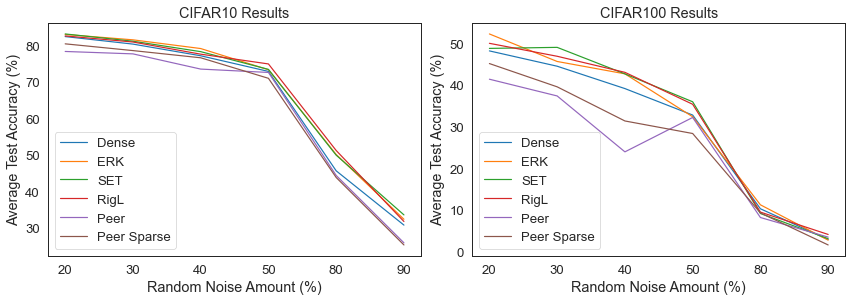

In [104]:
import matplotlib.pyplot as plt
y = exp1A['Unnamed: 0']
c10 = [c10Dense, c10ERK, c10SET, c10RIGL, c10Peer, c10PeerSparse]
c100 = [c100Dense, c100ERK, c100SET, c100RIGL, c100Peer, c100PeerSparse]
labels = ['Dense', 'ERK', 'SET', 'RigL', 'Peer', 'Peer Sparse']
# Plot results for RCN only
fig, ax = plt.subplots(1, 2, figsize = (12,4))
fig.tight_layout()
y = y[1:-2]
l = 0
for data in c10:
    if len(data) > 8:
        data = data[1:]
    ax[0].plot(y, data[:-2], label = labels[l])
    l += 1
ax[0].set_title('CIFAR10 Results')
l = 0
for data in c100:
    if len(data) > 8:
        data = data[1:]
    ax[1].plot(y, data[:-2], label = labels[l])
    l += 1
ax[1].set_title('CIFAR100 Results')
for a in ax:
    a.set_xlabel('Random Noise Amount (%)')
    a.set_ylabel('Average Test Accuracy (%)')
    a.legend()

plt.show()

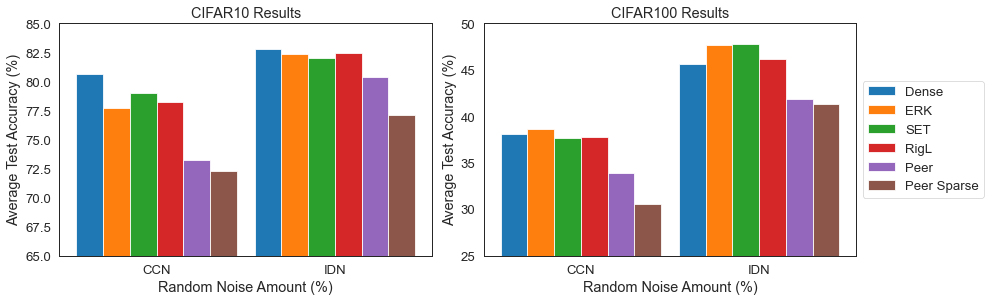

In [105]:
import matplotlib.pyplot as plt
y = exp1A['Unnamed: 0']
c10 = [c10Dense, c10ERK, c10SET, c10RIGL, c10Peer, c10PeerSparse]
c100 = [c100Dense, c100ERK, c100SET, c100RIGL, c100Peer, c100PeerSparse]
labels = ['Dense', 'ERK', 'SET', 'RigL', 'Peer', 'Peer Sparse']

# Plot results for CCN and IDN
fig, ax = plt.subplots(1, 2, figsize = (12,4))
fig.tight_layout()
y = y[1:-2]
x = np.arange(2)
width = 0.15

l = 0
pos = x - width*2.5
for data in c10:
    ax[0].bar(pos, data[-2:], width, label = labels[l])
    l += 1
    pos += width
ax[0].set_title('CIFAR10 Results')
l = 0
pos = x - width*2.5
for data in c100:
    ax[1].bar(pos, data[-2:], width, label = labels[l])
    l += 1
    pos += width
ax[1].set_title('CIFAR100 Results')
v = 0
for a in ax:
    a.set_xlabel('Random Noise Amount (%)')
    a.set_ylabel('Average Test Accuracy (%)')
    a.set_xticks(x, ['CCN', 'IDN'])
    a.set_ylim(65, 85) if v == 0 else a.set_ylim([25, 50])
    v += 1
    

ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.show()